In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

njobs = -1

In [3]:
train=pd.read_csv('train.csv',sep='|')

In [4]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


# Feature Engineering

In [5]:
train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer


def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)

In [8]:
#Reduce data sample to test loop structure
train = train.sample(frac=0.1, replace=True)

# Model factory

In [9]:
#!pip install imblearn --user

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from imblearn.pipeline import Pipeline
#Create multiple pipelines for different oversampling methods

pipeline = Pipeline([
        ('sampling', SMOTE()), #simple change oversampling method here and import it above, parameters could be tuned as well
        ('classification', RandomForestClassifier())
    ])

pipeline = Pipeline([
        ('sampling', SMOTE()), #simple change oversampling method here and import it above, parameters could be tuned as well
        ('classification', RandomForestClassifier())
    ])

pipeline = Pipeline([
        ('sampling', SMOTE()), #simple change oversampling method here and import it above, parameters could be tuned as well
        ('classification', RandomForestClassifier())
    ])

for i in 
model_tuning_factory = [
    GridSearchCV(pipeline,
                 dict(classification__n_estimators = range(5,200,5),
                      classification__criterion = ['entropy', 'gini']),
                 cv = skf,
                 scoring = my_custom_score,
                 n_jobs = -1)
]           
                 
                 
iterations = 10                
               
model_tuning_factory_randomized = [
    RandomizedSearchCV(RandomForestClassifier(),
                 dict(n_estimators = range(5,200,5),
                      criterion = ['entropy', 'gini']),
                 cv = skf,
                 scoring = my_custom_score,
                      n_iter  = iterations)
]

model_super_factory = [
    model_tuning_factory_1,
    model_tuning_factory_2,
    model_tuning_factory_3
    
]

C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [11]:
Y = train['fraud']
X = train.drop('fraud',axis=1)

In [12]:
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model"])

for oversampling_strategy in range(1,2):  # Oversamling strategies currtently not in the loop
    if (oversampling_strategy == 1):  
        Y = train['fraud']
        X = train.drop('fraud',axis=1)
        oversampling = "No Oversampling"
    elif (oversampling_strategy == 2):
        extended_train = randomOverSampling(train)
        Y = extended_train['fraud']
        X = extended_train.drop('fraud',axis=1)
        oversampling = "Random Oversampling"
    elif (oversampling_strategy == 3):
        extended_train = smoteOverSamling(train)
        Y = extended_train['fraud']
        X = extended_train.drop('fraud',axis=1)
        oversampling = "SMOTE"
    elif (oversampling_strategy == 3):
        extended_train = adasynOverSamling(train)
        Y = extended_train['fraud']
        X = extended_train.drop('fraud',axis=1)
        oversampling = "Adaysin"

    # Scaling is not relevant for Decision Trees
    for data_preparation_strategy in range(1,2):
        if (data_preparation_strategy == 1):  
            X_scaled = X
            data_preparation = "No Scaling"
        elif (data_preparation_strategy == 2):
            feature_scaler = MinMaxScaler()  
            X_scaled = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index) 
            data_preparation = "MinMaxScaler"
        elif (data_preparation_strategy == 3):
            feature_scaler = StandardScaler()  
            X_scaled = pd.DataFrame(feature_scaler.fit_transform(X.values), columns=X.columns, index=X.index)
            data_preparation = "StandardScaler"
        elif (data_preparation_strategy == 4):
            transformer = FunctionTransformer(np.log1p, validate=True)  
            X_scaled = pd.DataFrame(transformer.transform(X), columns=X.columns, index=X.index)
            data_preparation = "LogScaler"    

        for model in model_tuning_factory:   # replace with model_tuning_factory_randomized for faster results


            for feature_count in range(1,len(list(X))+1):

                model.seed = 42
                start_time = time.time()              


                # Solution with SelectKBest
                best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
                best_feature_list = X.columns[best_features.get_support()]
                X_selected_features = X[best_feature_list]

                model.fit(X_selected_features,Y)  
                model_name = model.best_estimator_.__class__.__name__
                score_mean = model.cv_results_['mean_test_score'][model.best_index_]
                score_std = model.cv_results_['std_test_score'][model.best_index_]

                result_table = result_table.append({
                 "Model": model_name, 
                 "Data Preparation": data_preparation,   
                 "Feature Count": feature_count,
                 "Feature Selection Technique": "SelectKBest",   
                 "Features": best_feature_list.values, 
                 "Optimal Parameters": model.best_params_,
                 "Monetary Value Per Instance - Mean":  score_mean,
                 "Monetary Value Per Instance - Standard Deviation": score_std,   
                 "Raw Model": model.best_estimator_
                  }, ignore_index=True)


                # Solution with Recursive Feature Elimination -> only works for some models

                if (model.estimator.__class__.__name__ == 'LogisticRegression'
                 or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
                 or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
                 or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
                 or model.estimator.__class__.__name__ == 'RandomForestClassifier'
                 or model.estimator.__class__.__name__ == 'BernoulliNB'
                 or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
                 or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
                 or model.estimator.__class__.__name__ == 'Perceptron'
                 or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'):

                   # Traditional RFE
                    rfe = RFE(model.estimator, n_features_to_select = feature_count)
                    rfe = rfe.fit(X,Y)
                    best_feature_list = np.array(list(X))[np.array(rfe.support_)]
                    X_selected_features = X[best_feature_list]

                    model.fit(X_selected_features,Y)  
                    model_name = model.best_estimator_.__class__.__name__
                    score_mean = model.cv_results_['mean_test_score'][model.best_index_]
                    score_std = model.cv_results_['std_test_score'][model.best_index_]


                    result_table = result_table.append({
                     "Model": model_name, 
                     "Data Preparation": data_preparation,
                     "Feature Count": feature_count,
                     "Feature Selection Technique": "RFE",
                     "Features": best_feature_list,
                     "Optimal Parameters": model.best_params_,
                     "Monetary Value Per Instance - Mean":  score_mean,
                     "Monetary Value Per Instance - Standard Deviation": score_std,  
                     "Raw Model": model.best_estimator_
                      }, ignore_index=True)

                end_time = time.time()

                print("Finished " + model.best_estimator_.__class__.__name__ + " with " + data_preparation + " and " + str(feature_count) + " features after " + str(round(end_time - start_time, 2)) + " seconds")



            if (model.estimator.__class__.__name__ == 'LogisticRegression'
             or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
             or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
             or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
             or model.estimator.__class__.__name__ == 'RandomForestClassifier'
             or model.estimator.__class__.__name__ == 'BernoulliNB'
             or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
             or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
             or model.estimator.__class__.__name__ == 'Perceptron'
             or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'):

                # RFE with Cross Validation -> determines the optimum feature count automatically
                rfecv = RFECV(model.estimator, cv = skf, scoring = my_custom_score)
                rfecv = rfe.fit(X,Y)
                best_feature_list = np.array(list(X))[np.array(rfecv.support_)]
                X_selected_features = X[best_feature_list]

                model.fit(X_selected_features,Y)  
                model_name = model.best_estimator_.__class__.__name__
                score_mean = model.cv_results_['mean_test_score'][model.best_index_]
                score_std = model.cv_results_['std_test_score'][model.best_index_]


                result_table = result_table.append({
                 "Model": model_name,  
                 "Data Preparation": data_preparation,
                 "Feature Count": len(best_feature_list),
                 "Feature Selection Technique": "RFECV",
                 "Features": best_feature_list,
                 "Optimal Parameters": model.best_params_,
                 "Monetary Value Per Instance - Mean":  score_mean,
                 "Monetary Value Per Instance - Standard Deviation": score_std,    
                 "Raw Model": model.best_estimator_
                  }, ignore_index=True)

result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 1 features after 44.42 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 2 features after 33.8 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 3 features after 36.86 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 4 features after 42.3 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 5 features after 47.86 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 6 features after 36.82 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 7 features after 38.41 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 8 features after 44.18 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 9 features after 43.26 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 10 features after 41.62 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 11 features after 40.64 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 12 features after 42.6 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 13 features after 41.26 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 14 features after 39.25 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 15 features after 41.93 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 16 features after 42.59 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 17 features after 44.51 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 18 features after 57.52 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 19 features after 49.47 seconds


C:\Users\z004032b\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 20 features after 46.05 seconds


,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model,Feature Selection Technique
10,Pipeline,No Scaling,11,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
15,Pipeline,No Scaling,16,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
2,Pipeline,No Scaling,3,"[trustLevel, scansWithoutRegistration, scanned...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
3,Pipeline,No Scaling,4,"[trustLevel, scansWithoutRegistration, scanned...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
4,Pipeline,No Scaling,5,"[trustLevel, scansWithoutRegistration, scanned...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
5,Pipeline,No Scaling,6,"[trustLevel, scansWithoutRegistration, lineIte...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
6,Pipeline,No Scaling,7,"[trustLevel, scansWithoutRegistration, lineIte...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
7,Pipeline,No Scaling,8,"[trustLevel, grandTotal, scansWithoutRegistrat...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
8,Pipeline,No Scaling,9,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
9,Pipeline,No Scaling,10,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest


In [13]:
result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model,Feature Selection Technique
10,Pipeline,No Scaling,11,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
15,Pipeline,No Scaling,16,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
2,Pipeline,No Scaling,3,"[trustLevel, scansWithoutRegistration, scanned...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
3,Pipeline,No Scaling,4,"[trustLevel, scansWithoutRegistration, scanned...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
4,Pipeline,No Scaling,5,"[trustLevel, scansWithoutRegistration, scanned...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
5,Pipeline,No Scaling,6,"[trustLevel, scansWithoutRegistration, lineIte...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
6,Pipeline,No Scaling,7,"[trustLevel, scansWithoutRegistration, lineIte...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
7,Pipeline,No Scaling,8,"[trustLevel, grandTotal, scansWithoutRegistrat...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
8,Pipeline,No Scaling,9,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest
9,Pipeline,No Scaling,10,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'classification__criterion': 'entropy', 'clas...",0.186170,0.171747,"(SMOTE(k_neighbors=5, kind='deprecated', m_nei...",SelectKBest


In [14]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'sampling', 'classification', 'sampling__k_neighbors', 'sampling__kind', 'sampling__m_neighbors', 'sampling__n_jobs', 'sampling__out_step', 'sampling__random_state', 'sampling__ratio', 'sampling__sampling_strategy', 'sampling__svm_estimator', 'classification__bootstrap', 'classification__class_weight', 'classification__criterion', 'classification__max_depth', 'classification__max_features', 'classification__max_leaf_nodes', 'classification__min_impurity_decrease', 'classification__min_impurity_split', 'classification__min_samples_leaf', 'classification__min_samples_split', 'classification__min_weight_fraction_leaf', 'classification__n_estimators', 'classification__n_jobs', 'classification__oob_score', 'classification__random_state', 'classification__verbose', 'classification__warm_start'])

In [15]:
result_table.to_pickle("result_table_Random_Forest.pkl")
#result_table = pd.read_pickle("result_table_Random_Forest.pkl")

Text(0,0.5,'Monetary Value Per Instance - Mean')

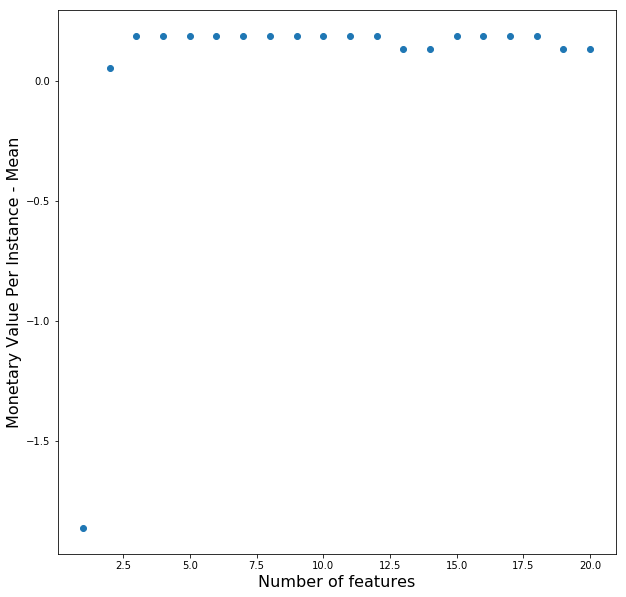

In [16]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(result_table["Feature Count"], result_table["Monetary Value Per Instance - Mean"])
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

In [17]:
best_model = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
best_model_features = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Features"]
best_parameters = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"]

print(best_model)
print(best_model_features)
print(best_parameters)

Pipeline(memory=None,
         steps=[('sampling',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=None, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('classification',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='entropy', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=5, n_jobs=None,
                

In [18]:
from sklearn.metrics import confusion_matrix

def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score
    
cm = confusion_matrix(Y , best_model.predict(X[best_model_features]))

monetary_value = get_monetary_value(cm)

True negative:  177
False positive:  0
False negative:  1
True positive:  10
45 for 188 instances in the test set
0.2393617021276596 per instance in the test set
